## import libraries



In [378]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import time


## read data from csv file

In [379]:
df = pd.read_csv("./insurance.csv")

# show top 10 rows of file
print(df.head(10))

# show detail of data
print(df.info())


# filtering datas
print(df.sort_values('age')[['age', 'charges']].head(10))

   age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520
5   31  25.740         0   3756.62160
6   46  33.440         1   8240.58960
7   37  27.740         3   7281.50560
8   37  29.830         2   6406.41070
9   60  25.840         0  28923.13692
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB
None
      age      charges
1248   18   1633.96180
482    18   1622.18850
492    18   2196.47320
525    18  11482.63485
529    18   1708.00140
564    18   2801.25880
571    18   2219.44510
61

## define data X and Y as numpy array
after read data from excel, normalize it with bellow formula : 

new_x = (x - min(x)) / (max(x) - min(x))

In [428]:
# X present parameters (age, bmi, children)
X = df.iloc[:, :-1].to_numpy()
#X2 = X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

# Y present actual values of result (charges)
Y = df.iloc[:, -1].to_numpy()
#Y2 = np.array((Y-Y.mean())/Y.std())

print(X)
print(Y)

# Normalize data 
X_N = (X - X.min()) / (X.max() - X.min())
Y_N = (Y - Y.min()) / (Y.max() - Y.min())

print(X_N, X_N.shape)
print(Y_N, Y_N.shape)




[[19.   27.9   0.  ]
 [18.   33.77  1.  ]
 [28.   33.    3.  ]
 ...
 [18.   36.85  0.  ]
 [21.   25.8   0.  ]
 [61.   29.07  0.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
[[0.296875   0.4359375  0.        ]
 [0.28125    0.52765625 0.015625  ]
 [0.4375     0.515625   0.046875  ]
 ...
 [0.28125    0.57578125 0.        ]
 [0.328125   0.403125   0.        ]
 [0.953125   0.45421875 0.        ]] (1338, 3)
[0.25161076 0.00963595 0.05311516 ... 0.00810808 0.01414352 0.44724873] (1338,)


## implement MSE cost function
#### Y : is real value of result
#### Y_hat : is predicted value of result

calcute MSE cost function with bellow formula : 

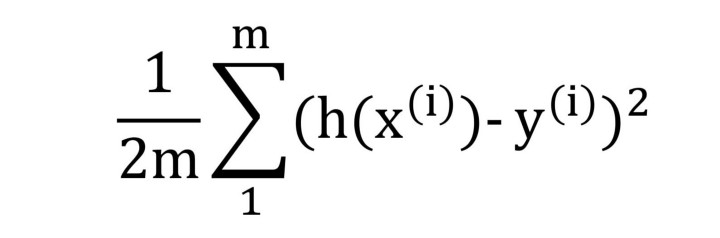

In [381]:
def mse_cost(Y, Y_hat):
    return np.sum((Y_hat - Y)**2) / (2 * len(Y))
    #return sum([val**2 for val in (Y-Y_hat)]) / (2 * len(Y))

## implement predict function

this function, get three parameters (b , theta, X) and then calcute predicted Y with this parameters.

new_y = X.THETA + b


In [382]:
def predict_Y(b, theta, X):
    return b + np.dot(X, theta)


## update THETA with bellow furmols:
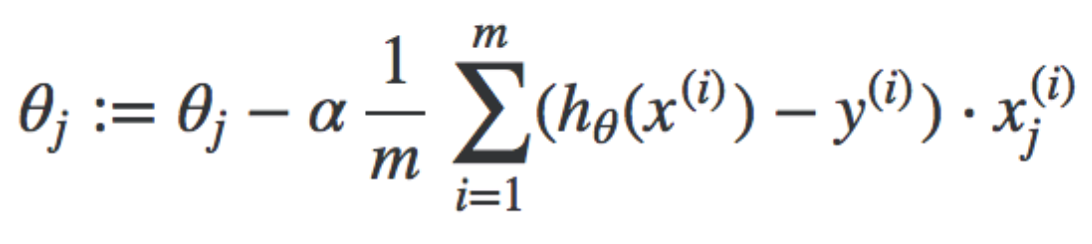

In [383]:
def update_theta(X, Y, Y_hat, b_0, theta_0, learning_rate):
    d_b= -np.sum(Y - Y_hat) / len(Y)
    d_weight = -np.sum(np.dot((Y - Y_hat), X))  / len(Y)
    
    b_1 = b_0 - (learning_rate * d_b)
    theta_1 = theta_0 - (learning_rate * d_weight)
    
    return b_1, theta_1
    

## initialize bias and weights 

select randomlly value for b and theta

In [420]:
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta


## run batch-gradient descent algorithm

#### step 1 : 
select random value for b and theta in initialize() function

#### step 2 : 
define gd_iterations_df for save iterations and cost value each 10 epoch

#### step 3 : 
start learning in loop.
in each epoch:
 - calcute Y_hat with predict_Y() function
 - calcute cost of that epoch with mse_cost() function
 - update value of theta and b with update_theta() function
 - and save value of iteration and cost each 10 epoch (if you want save data of each epoch set 1)

#### step 4 : 
run gradient descent algorithm with suitable value for alpha and number of iteration


In [421]:
def batch_gradient_descent(X, Y, alpha, num_iterations):
    b,theta=initialize(X.shape[1])
    epoch_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration', 'cost'])
    result_idx=0
    for epoch in range(num_iterations):
        Y_hat= predict_Y(b, theta, X)
        this_cost= mse_cost(Y, Y_hat)
        prev_b= b
        prev_theta= theta
        b,theta= update_theta(X, Y, Y_hat, prev_b, prev_theta, alpha)
        if(epoch % 1 == 0):
            gd_iterations_df.loc[result_idx]=[epoch_num, this_cost]
            result_idx += 1
            epoch_num += 1
    print("Final Estimate of b and theta : ", b, theta)
    return gd_iterations_df, b, theta


s_time = time.time()
bgd_iterations_df,b,theta = batch_gradient_descent(X, Y,  alpha=0.0001, num_iterations=100)
timer_1 = time.time() - s_time
s_time = time.time()
bgd_iterations_df_normalized,b,theta = batch_gradient_descent(X_N, Y_N,  alpha=0.0001, num_iterations=100)
timer_2 = time.time() - s_time

print(f"betch-gradient-descent with normalized data time : {timer_2}")
print(f"betch-gradient-descent without normalized data time : {timer_1}")



Final Estimate of b and theta :  0.35350816373819205 [190.4505272  190.5884615  189.85459917]
Final Estimate of b and theta :  0.22553500003129243 [0.09087548 0.84437137 0.84563582]
betch-gradient-descent with normalized data time : 0.07693243026733398
betch-gradient-descent without normalized data time : 0.09091973304748535


## draw plot for batch-gradient-descent
draw MSE cost function per iterations number

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


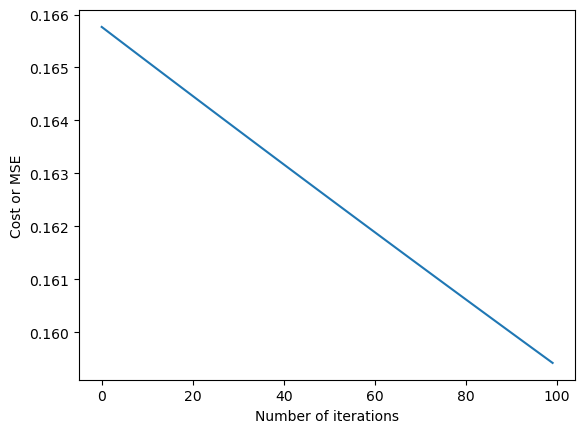

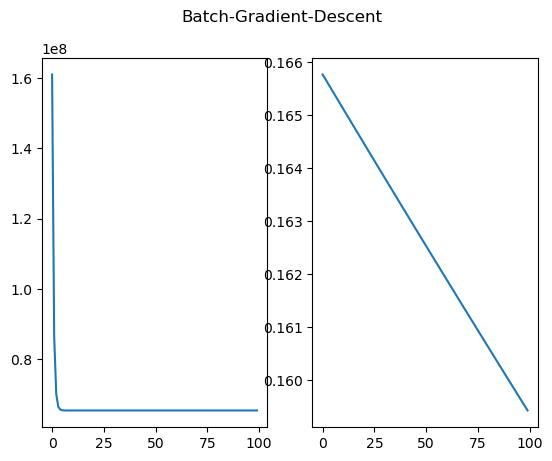

In [418]:
plt.plot(bgd_iterations_df_normalized['iteration'],bgd_iterations_df_normalized['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Batch-Gradient-Descent')
ax1.plot(bgd_iterations_df['iteration'], bgd_iterations_df['cost'])
ax2.plot(bgd_iterations_df_normalized['iteration'], bgd_iterations_df_normalized['cost'])


## run stochastic-gradient descent algorithm

#### step 1 : 
select random value for b and theta in initialize() function

#### step 2 : 
define gd_iterations_df for save iterations and cost value each 10 epoch

#### step 3 : 
start learning in loop.
in each epoch:
 - choice random index for select one data from X and Y stochasticlly
 - calcute Y_hat with predict_Y() function
 - calcute cost of that epoch with mse_cost() function
 - update value of theta and b with update_theta() function
 - and save value of iteration and cost each 10 epoch (if you want save data of each epoch set 1)

#### step 4 : 
run gradient descent algorithm with suitable value for alpha and number of iteration

In [465]:
def stochastic_gradient_descent(X, Y, alpha, num_iterations):
    b, theta=initialize(X.shape[1])
    epoch_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration', 'cost'])
    result_idx=0
    for epoch in range(num_iterations):
        random_index = np.random.choice(len(Y))
        X = np.array([X[random_index]])
        Y = np.array([Y[random_index]])
        Y_hat= predict_Y(b, theta, X)
        this_cost= mse_cost(Y, Y_hat)
        prev_b= b
        prev_theta= theta
        b,theta= update_theta(X, Y, Y_hat, prev_b, prev_theta, alpha)
        if(epoch % 1 == 0):
            gd_iterations_df.loc[result_idx]=[epoch_num, this_cost]
            result_idx += 1
            epoch_num += 1
    print("Final Estimate of b and theta : ", b, theta)
    return gd_iterations_df, b, theta


s_time = time.time()
sgd_iterations_df,b,theta=stochastic_gradient_descent(X, Y,  alpha=0.001, num_iterations=1000)
timer_1 = time.time() - s_time
s_time = time.time()
sgd_iterations_df_normalized,b,theta=stochastic_gradient_descent(X_N, Y_N,  alpha=0.001, num_iterations=1000)
timer_2 = time.time() - s_time

print(f"betch-gradient-descent with normalized data time : {timer_2}")
print(f"betch-gradient-descent without normalized data time : {timer_1}")


/tmp/ipykernel_119031/1392912049.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_119031/1392912049.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_119031/1392912049.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_119031/1392912049.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_119031/1392912049.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_119031/1392912049.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_119031/1392912049.py:2: RuntimeWarning: overflow encountered in square
  return np.sum((Y_hat - Y)**2) / (2 * len(Y))
/tmp/ipykernel_119031/1392912049.py:2: RuntimeWarning: overflow encou

Final Estimate of b and theta :  nan [nan nan nan]
Final Estimate of b and theta :  0.20717817661847848 [ 0.22547069 -0.15406825  0.06212642]
betch-gradient-descent with normalized data time : 0.8836016654968262
betch-gradient-descent without normalized data time : 0.8451027870178223


## draw plot for stochastic-gradient-descent
draw MSE cost function per iterations number

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


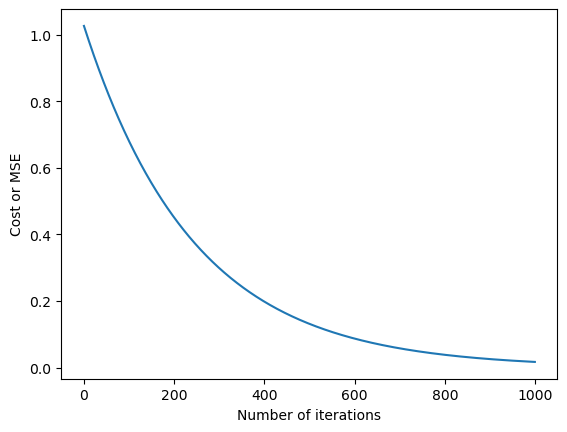

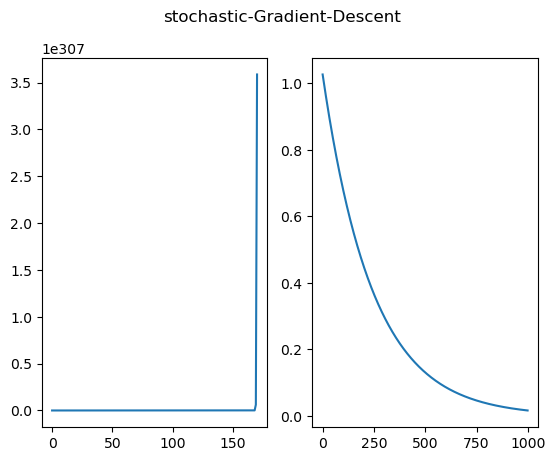

In [466]:
plt.plot(sgd_iterations_df_normalized['iteration'], sgd_iterations_df_normalized['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('stochastic-Gradient-Descent')
ax1.plot(sgd_iterations_df['iteration'], sgd_iterations_df['cost'])
ax2.plot(sgd_iterations_df_normalized['iteration'], sgd_iterations_df_normalized['cost'])

## run mini-batch-gradient descent algorithm

#### step 1 : 
select random value for b and theta in initialize() function

#### step 2 : 
define gd_iterations_df for save iterations and cost value each 10 epoch

#### step 3 : 
start learning in loop.
in each epoch:
 - choice random index group for select group of data from X and Y 
 - calcute Y_hat with predict_Y() function
 - calcute cost of that epoch with mse_cost() function
 - update value of theta and b with update_theta() function
 - and save value of iteration and cost each 10 epoch (if you want save data of each epoch set 1)

#### step 4 : 
run gradient descent algorithm with suitable value for alpha and number of iteration

In [424]:
def mini_batch_gradient_descent(X, Y, alpha, num_iterations, group_size):
    b, theta=initialize(X.shape[1])
    epoch_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration', 'cost'])
    result_idx=0
    for epoch in range(num_iterations):
        random_index_group = np.random.choice(len(Y), group_size)
        X = X[random_index_group]
        Y = Y[random_index_group]
        Y_hat= predict_Y(b, theta, X)
        this_cost= mse_cost(Y, Y_hat)
        prev_b= b
        prev_theta= theta
        b,theta= update_theta(X, Y, Y_hat, prev_b, prev_theta, alpha)
        if(epoch % 1 == 0):
            gd_iterations_df.loc[result_idx]=[epoch_num, this_cost]
            result_idx += 1
            epoch_num += 1
    print("Final Estimate of b and theta : ", b, theta)
    return gd_iterations_df, b, theta



s_time = time.time()
mbgd_iterations_df,b,theta= mini_batch_gradient_descent(X, Y,  alpha=0.001, num_iterations=100, group_size= 5)
timer_1 = time.time() - s_time
s_time = time.time()
mbgd_iterations_df_normalized,b,theta= mini_batch_gradient_descent(X_N, Y_N,  alpha=0.001, num_iterations=100, group_size= 5)
timer_2 = time.time() - s_time

print(f"betch-gradient-descent with normalized data time : {timer_2}")
print(f"betch-gradient-descent without normalized data time : {timer_1}")


Final Estimate of b and theta :  -1.2331821355869317e+81 [-1.07163528e+83 -1.07163528e+83 -1.07163528e+83]
Final Estimate of b and theta :  0.4564277724159826 [0.15572796 0.50415852 0.07546733]
betch-gradient-descent with normalized data time : 0.08262777328491211
betch-gradient-descent without normalized data time : 0.09399890899658203


## draw plot for mini-batch-gradient-descent
draw MSE cost function per iterations number

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


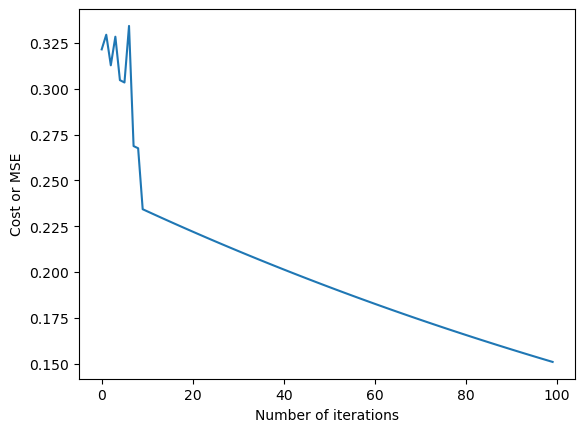

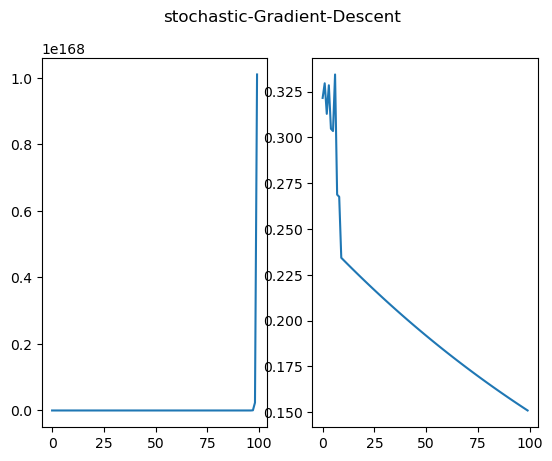

In [425]:
plt.plot(mbgd_iterations_df_normalized['iteration'], mbgd_iterations_df_normalized['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('stochastic-Gradient-Descent')
ax1.plot(mbgd_iterations_df['iteration'], mbgd_iterations_df['cost'])
ax2.plot(mbgd_iterations_df_normalized['iteration'], mbgd_iterations_df_normalized['cost'])

## gradient descent with sklearn library

now we use sklearn library to find solution for this datas
    

In [442]:
from sklearn.linear_model import LinearRegression

s_time = time.time()

regressor = LinearRegression()

regressor.fit(X_N, Y_N)

timer = time.time() - s_time

print(regressor.intercept_)

print(regressor.coef_)

print("timer : " , timer)

-0.12830491241144207
[0.2451716  0.33924702 0.55457525]
timer :  0.0023124217987060547


## gradient descent with close solution ( Normal Equation )

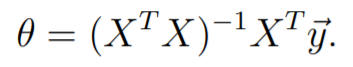

In [462]:
def normal_equation(X, Y):
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
    return theta

ne_theta = normal_equation(X_N, Y_N)
print(ne_theta)

[0.20422842 0.13791416 0.39407646]
